<a href="https://colab.research.google.com/github/leonmarienga/Android-app/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [19]:
df = pd.read_csv('/content/AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [20]:
df.info()
#data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571058 entries, 0 to 5571057
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 467.5+ MB


In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [22]:
df['isFraud'].value_counts() #see all  uniques values

,count
isFraud,
0.0,5566672
1.0,4385


In [23]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,5571053
1.0,4


In [24]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [25]:
df.shape

(5571058, 11)

In [26]:
df = df.dropna()
#remove rows with null values

In [27]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,5566672
1.0,4385


In [28]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [31]:
round(df['isFraud'].value_counts()[1] / df.shape[0] * 100,2)
# percentage of frauds, rounded to the nearest 2 dp

np.float64(0.08)

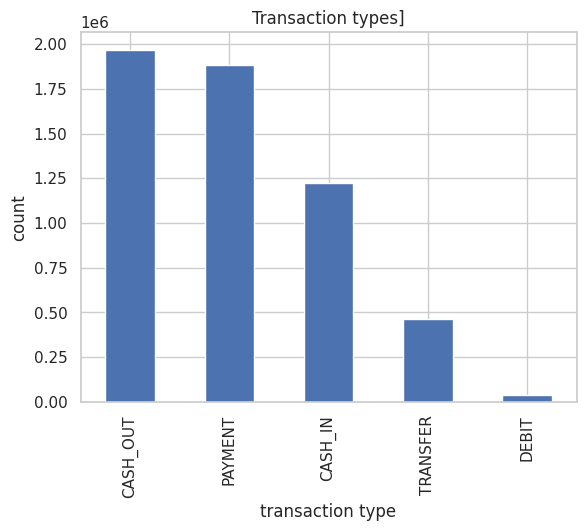

In [30]:
df['type'].value_counts().plot(kind ='bar', title='Transaction types]')
plt.xlabel('transaction type')
plt.ylabel('count')
plt.show()

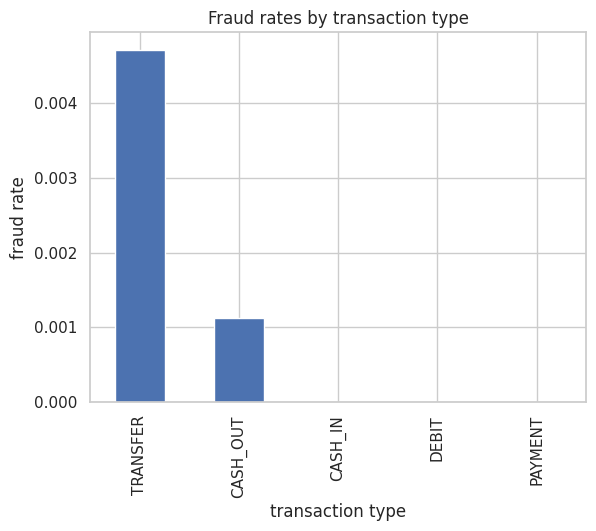

In [32]:
fraud_rates_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_rates_by_type.plot(kind='bar', title='Fraud rates by transaction type')
plt.xlabel('transaction type')
plt.ylabel('fraud rate')
plt.show()


In [33]:
df['amount'].describe().astype('int')

,amount
count,5571057
mean,180825
std,626692
min,0
25%,13277
50%,75046
75%,209033
max,92445516


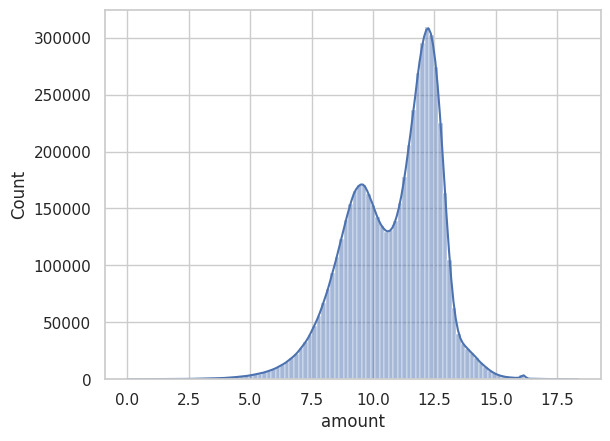

In [34]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True)#reduces the focus on exponential values and eliminates the effects of log(0)
plt.show()

**shows there are 2 dominant transaction**

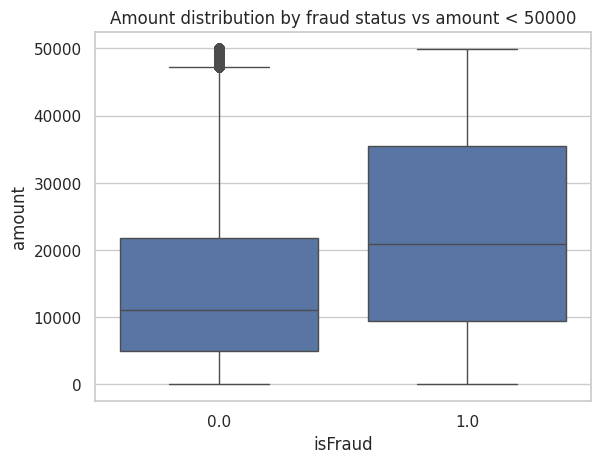

In [36]:
sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000]) #x tests the values of the features against the fraud ammount
plt.title('Amount distribution by fraud status vs amount < 50000')
plt.show()

**shows the range at which fraud occurs(between 10000 and 20000)**

In [38]:
df['balanceDiffOrig']=df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest']=df['oldbalanceDest'] - df['newbalanceDest']

In [39]:
(df['balanceDiffOrig']<0).sum()

np.int64(1221738)

In [40]:
(df['balanceDiffDest']<0).sum()

np.int64(2464178)

11 min
